# Sentiment Analysis using BERT
Bidirectional Encoder Representations from Transformers

In [ ]:
!nvidia-smi

Thu Jul 28 09:14:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import re
from pythainlp.tokenize import word_tokenize, Tokenizer

import numpy as np

import ktrain
from ktrain import text
# from collections import Counter

import seaborn as sn
import matplotlib.pyplot as plt

# import pickle as p
import plotly
import plotly.graph_objs as go

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import string
from string import punctuation

#########################
from pythainlp.corpus.common import thai_words

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from pythainlp.corpus import thai_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.getcwd())

/content


In [ ]:
data_path = 'drive/My Drive/source'
print(os.listdir(data_path))

['#โควิด19.csv', 'รวม.csv', 'tt.csv', 'รวมเพิ่ม.csv', 'FixeD.csv', 'fixedall.csv', '3121.csv', '2751.csv', '3193 with no รายงานสถานการณ์.csv', '6173.csv', 'no.csv', 'T1', '.ipynb_checkpoints', 'การรักษาเดือน 1 (11).csv', '10005.gsheet', '10005.csv', '9224.csv', '9224k.csv', '9224t.csv', '9224k-nozero.csv', '9224k-nozero (1).csv', 'รวม 10005.xlsx', 'รวม 10005.csv', 'รวม 10005++.xlsx', 'รวม 10005++.csv', 'รวม_10005_more.xlsx', 'รวม_10005_more.csv', 'รวม 10005 - Copy.csv', 'รวม 11046 eng.csv', 'รวม 11046.csv']


In [ ]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

#โควิด19.csv
รวม.csv
tt.csv
รวมเพิ่ม.csv
FixeD.csv
fixedall.csv
3121.csv
2751.csv
3193 with no รายงานสถานการณ์.csv
6173.csv
no.csv
T1
.ipynb_checkpoints
การรักษาเดือน 1 (11).csv
10005.gsheet
10005.csv
9224.csv
9224k.csv
9224t.csv
9224k-nozero.csv
9224k-nozero (1).csv
รวม 10005.xlsx
รวม 10005.csv
รวม 10005++.xlsx
รวม 10005++.csv
รวม_10005_more.xlsx
รวม_10005_more.csv
รวม 10005 - Copy.csv
รวม 11046 eng.csv
รวม 11046.csv


In [ ]:
import pandas as pd

In [ ]:
file_name = data_path+'/รวม 10005.csv'
file_name

'drive/My Drive/source/รวม 10005.csv'

In [ ]:
df = pd.read_csv(file_name,encoding ='utf-8',  usecols=[0,1] ,names=['sentence','types'], header=0)

In [ ]:
df.head()

,sentence,types
0,ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ COVID-19 จังหว...,รายงานสถานการณ์
1,มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#Covid_...,ความเป็นอยู่
2,ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ COVID-19 จังหว...,รายงานสถานการณ์
3,ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...,รายงานสถานการณ์
4,ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...,รายงานสถานการณ์


In [ ]:
df = df.drop_duplicates()

In [ ]:
mentality_df = df[df.types == "ไม่สบายใจ"]
mentality_df.head()

,sentence,types
11,และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...,ไม่สบายใจ
18,ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...,ไม่สบายใจ
25,หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...,ไม่สบายใจ
34,ปิดรอบนี้โดนจ้างออกแน่ #โควิด,ไม่สบายใจ
38,วันนี้ เพิ่มอีก 279 ตายล่ะ เสี่ยงไปไหนได้บ้าง ...,ไม่สบายใจ


In [ ]:
print(len(mentality_df))

1791


In [ ]:
treatment_df = df[df.types == "การรักษา"]
treatment_df.head()

,sentence,types
85,เมื่อมีอาการไอ เจ็บคอ หายใจเหนื่อย มีน้ำมูก จม...,การรักษา
99,หนึ่งในกิจวัตรประจำวันของช่วงนี้ที่ให้ความสำคั...,การรักษา
195,รีไว้เช็คอาการตัวเอง 🤔 #Covid_19 https://t.co/...,การรักษา
253,น้องที่รู้จักทำงานเป็นhealthcare worker ที่อัง...,การรักษา
319,#เราติดหรือยังนะ ? เป็นประโยคที่หลายคนถามตัวเอ...,การรักษา


In [ ]:
print(len(treatment_df))

430


In [ ]:
being_df = df[df.types == "ความเป็นอยู่"]
being_df.head()

,sentence,types
1,มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#Covid_...,ความเป็นอยู่
19,เปิดมาปีแรก​ ยิมก็จะปิดเพราะ​ covid​ อีกแล้ววว...,ความเป็นอยู่
39,ตั้งแต่ปีใหม่นี้ #เปิดบริการทุกวัน #chithailan...,ความเป็นอยู่
60,ประกาศมหาวิทยาลัยศรีนครินทรวิโรฒ\nเรื่อง มาตรก...,ความเป็นอยู่
65,#Covid_19\n#COVID19\n\n เด็กๆหยุดเรียน​เพื่อ​ค...,ความเป็นอยู่


In [ ]:
print(len(being_df))

1728


In [ ]:
situationrp_df = df[df.types == "รายงานสถานการณ์"]
situationrp_df.head()

,sentence,types
0,ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ COVID-19 จังหว...,รายงานสถานการณ์
2,ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ COVID-19 จังหว...,รายงานสถานการณ์
3,ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...,รายงานสถานการณ์
4,ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...,รายงานสถานการณ์
5,ด่วน! แม่ค้าขายพริกแกงติดโควิด-19\n\n22:52 ศูน...,รายงานสถานการณ์


In [ ]:
print(len(situationrp_df))

1142


In [ ]:
vaccine_df = df[df.types == "วัคซีน"]
vaccine_df.head()

,sentence,types
53,ถ้าผลข้างเคียงวัคซีน​ที่คนจะฉีดกันทั้งโลก​ ทำใ...,วัคซีน
103,อิสราเอลฉีดวัคซีน COVID-19 เพียง 15 วันครอบคลุ...,วัคซีน
120,ประเทศไทยมีประชากรประมาณ 68 ล้านคน แต่เดือนกุม...,วัคซีน
154,เจ็บแน่ แต่ไม่จบหรอก ถ้าไม่เร่งวัคซีน\n#Covid_19,วัคซีน
270,นายกฯมั่นใจคนไทยได้รับวัคซีนไม่ช้ากว่าประเทศอื...,วัคซีน


In [ ]:
print(len(vaccine_df))

667


In [ ]:
help_df = df[df.types == "หาความช่วยเหลือ"]
help_df.head()

,sentence,types
68,ช่วยชาวบางละมุง พัทยา กันนะคะ#Covid_19 #nontfa...,หาความช่วยเหลือ
208,ช่วยกันรีโพสหน่อยนะคะ 🙏🏻 ช่วยกันเซฟจังหวัดของเ...,หาความช่วยเหลือ
548,ด้วยสถานการณ์ COVID-19 อาจจะคิดว่าเป็นช่วงเวลา...,หาความช่วยเหลือ
558,ช่วงโควิด ถ้าคิดอยากทำบุญ ขอนำเหนอ ให้ทุกคนไปบ...,หาความช่วยเหลือ
663,#ประกาศชี้แจง สภากาชาดไทยมีทั้งหมด 13 หน่วยงาน...,หาความช่วยเหลือ


In [ ]:
print(len(help_df))

155


In [ ]:
other_df = df[df.types == "อื่นๆ"]
other_df.head()

,sentence,types
9,เชื่อมโยง ราชบุรี-เพชรบุรี 😳 #โควิท19 #โควิดวั...,อื่นๆ
13,โควิดติดแล้วมีสิทธิ์ตาย \nแต่ถ้าติดผู้ชาย ถึงต...,อื่นๆ
16,ฝ่าวิกฤต COVID-19 ด้วยศาสตร์พระราชา\nhttps://t...,อื่นๆ
17,#Covid_19 สะกดแบบไหน,อื่นๆ
20,#azumasoba รีบทานก่อนโดนสั่งปิด #โควิด https:/...,อื่นๆ


In [ ]:
print(len(other_df))

4025


In [ ]:
sentiment_df = pd.concat([mentality_df,treatment_df,being_df,situationrp_df,vaccine_df,help_df,other_df])
sentiment_df.head()

,sentence,types
11,และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...,ไม่สบายใจ
18,ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...,ไม่สบายใจ
25,หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...,ไม่สบายใจ
34,ปิดรอบนี้โดนจ้างออกแน่ #โควิด,ไม่สบายใจ
38,วันนี้ เพิ่มอีก 279 ตายล่ะ เสี่ยงไปไหนได้บ้าง ...,ไม่สบายใจ


In [ ]:
print(len(sentiment_df))

9938


In [ ]:
sentiment_df['clean_sentence'] = sentiment_df['sentence'].fillna('').apply(lambda x: x.lower())
sentiment_df.head()

,sentence,types,clean_sentence
11,และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...,ไม่สบายใจ,และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...
18,ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...,ไม่สบายใจ,ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...
25,หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...,ไม่สบายใจ,หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...
34,ปิดรอบนี้โดนจ้างออกแน่ #โควิด,ไม่สบายใจ,ปิดรอบนี้โดนจ้างออกแน่ #โควิด
38,วันนี้ เพิ่มอีก 279 ตายล่ะ เสี่ยงไปไหนได้บ้าง ...,ไม่สบายใจ,วันนี้ เพิ่มอีก 279 ตายล่ะ เสี่ยงไปไหนได้บ้าง ...


In [ ]:
pun = '"#\'()*,-.;<=>[\\]^_`{|}~'
pun

'"#\'()*,-.;<=>[\\]^_`{|}~'

In [ ]:
sentiment_df['clean_comments'] = sentiment_df['clean_sentence'].str.replace(r'[%s]' % (pun), '', regex=True)

In [ ]:
sentiment_df.sample(5)

,sentence,types,clean_sentence,clean_comments
4265,ขอให้ทุกคนสุขภาพแข็งแรง รอดปลอดภัยจากเชื้อโรคโ...,อื่นๆ,ขอให้ทุกคนสุขภาพแข็งแรง รอดปลอดภัยจากเชื้อโรคโ...,ขอให้ทุกคนสุขภาพแข็งแรง รอดปลอดภัยจากเชื้อโรคโ...
6953,2 หมื่นแล้ว ภูมิใจไหมคะ @prayutofficial #โคว...,ไม่สบายใจ,2 หมื่นแล้ว ภูมิใจไหมคะ @prayutofficial #โคว...,2 หมื่นแล้ว ภูมิใจไหมคะ @prayutofficial โควิ...
3747,ใครตรวจเชื้อที่รพ. วันไปตรวจ ให้ขอยาตามอาการติ...,การรักษา,ใครตรวจเชื้อที่รพ. วันไปตรวจ ให้ขอยาตามอาการติ...,ใครตรวจเชื้อที่รพ วันไปตรวจ ให้ขอยาตามอาการติด...
3223,📣 รายงานสถานการณ์ผู้ป่วยติดเชื้อไวรัสโคโรนา201...,รายงานสถานการณ์,📣 รายงานสถานการณ์ผู้ป่วยติดเชื้อไวรัสโคโรนา201...,📣 รายงานสถานการณ์ผู้ป่วยติดเชื้อไวรัสโคโรนา201...
4025,ถามผู้รู้ค่ะ สำหรับผู้ที่มีโรคประจำตัวจ\nองฉีด...,วัคซีน,ถามผู้รู้ค่ะ สำหรับผู้ที่มีโรคประจำตัวจ\nองฉีด...,ถามผู้รู้ค่ะ สำหรับผู้ที่มีโรคประจำตัวจ\nองฉีด...


In [ ]:
custom_words_list = set(thai_words())
len(custom_words_list)

62051

In [ ]:
st = "โอเคบ่พวกเรารักภาษาบ้านเกิด"

custom_tokenizer = Tokenizer(custom_words_list)
custom_tokenizer.word_tokenize(st)

['โอเค', 'บ่', 'พวกเรา', 'รัก', 'ภาษา', 'บ้านเกิด']

In [ ]:
sentiment_df['clean_sentence'] = sentiment_df['clean_sentence'].apply(lambda x: custom_tokenizer.word_tokenize(x))

In [ ]:
sentiment_df.sample(5)

,sentence,types,clean_sentence,clean_comments
8614,ส่งของอีกทีวันที่ 15 นะคะ\nเพราะมีคนติดโควิดค่...,ความเป็นอยู่,"[ส่ง, ของ, อีกที, วันที่, , 15, , นะคะ, \n, ...",ส่งของอีกทีวันที่ 15 นะคะ\nเพราะมีคนติดโควิดค่...
736,ผู้ป่วยโควิด-19 จะกลับไปทำงานได้เมื่อไร และโรง...,ไม่สบายใจ,"[ผู้ป่วย, โควิด, -, 19, , จะ, กลับ, ไป, ทำงาน...",ผู้ป่วยโควิด19 จะกลับไปทำงานได้เมื่อไร และโรงง...
695,ขอให้โควิดหมดจากโลกโดยเร็วด้วยจะดีมาก https://...,อื่นๆ,"[ขอให้, โควิด, หมด, จาก, โลก, โดยเร็ว, ด้วย, จ...",ขอให้โควิดหมดจากโลกโดยเร็วด้วยจะดีมาก https://...
1030,👴🏻 เอไอเอส ไปเมื่อไหร่\n🤦🏻‍♀️ ไปอะไรเล่า ยังไม...,อื่นๆ,"[👴🏻, , เอไอเอส, , ไป, เมื่อไหร่, \n, 🤦🏻‍♀️, ...",👴🏻 เอไอเอส ไปเมื่อไหร่\n🤦🏻‍♀️ ไปอะไรเล่า ยังไม...
6324,มีแต่อำนาจสั่งปิดกิจการ\nแต่ไร้ประสิทธิภาพในกา...,อื่นๆ,"[มี, แต่, อำนาจ, สั่ง, ปิดกิจการ, \n, แต่, ไร้...",มีแต่อำนาจสั่งปิดกิจการ\nแต่ไร้ประสิทธิภาพในกา...


In [ ]:
tokenized_doc = sentiment_df['clean_sentence']
tokenized_doc[:10]

11    [และ, แล้ว, ธุรกิจ, สีเทา,  , ของ, คนมีสี,  , ...
18    [ผู้ป่วย, รายวัน, เยอะ, ขนาด, นี้,  , แล้ว, เร...
25    [หลัง, ปีใหม่,   , เรา, กับ, แฟน, คิด, ตรงกัน,...
34    [ปิด, รอบ, นี้, โดน, จ้าง, ออก, แน่,  , #, โควิด]
38    [วันนี้,  , เพิ่ม, อีก,  , 279,  , ตาย, ล่ะ,  ...
40    [คำ, ว่า,  , “, หนักหน่วง, ”,  , และ,  , “, หน...
61    [เศรษฐกิจ, ไตรมาส, หนึ่ง, กับ, สอง, ไม่, น่า, ...
62    [ช่วงนี้, พยายาม, เก็บ, เงิน,  , อย่า, ใช้, เง...
92    [เริ่ม, ต้นปี, ได้, ปัง, ๆ,  , ด้วย, ยอด, ที่,...
93    [ปิด, บ่อน, ให้ได้,  , =,  , ตั้ง, การ์ด, !!, ...
Name: clean_sentence, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
tokenized_doc[:10]

11    [และ, แล้ว, ธุรกิจ, สีเทา,  , ของ, คนมีสี,  , ...
18    [ผู้ป่วย, รายวัน, เยอะ, ขนาด, นี้,  , แล้ว, เร...
25    [หลัง, ปีใหม่,   , เรา, กับ, แฟน, คิด, ตรงกัน,...
34    [ปิด, รอบ, นี้, โดน, จ้าง, ออก, แน่,  , #, โควิด]
38    [วันนี้,  , เพิ่ม, อีก,  , 279,  , ตาย, ล่ะ,  ...
40    [คำ, ว่า,  , “, หนักหน่วง, ”,  , และ,  , “, หน...
61    [เศรษฐกิจ, ไตรมาส, หนึ่ง, กับ, สอง, ไม่, น่า, ...
62    [ช่วงนี้, พยายาม, เก็บ, เงิน,  , อย่า, ใช้, เง...
92    [เริ่ม, ต้นปี, ได้, ปัง, ๆ,  , ด้วย, ยอด, ที่,...
93    [ปิด, บ่อน, ให้ได้,  , =,  , ตั้ง, การ์ด, !!, ...
Name: clean_sentence, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.to_list()

In [ ]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
    t = ''.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
sentiment_df['clean_comments'] = detokenized_doc

In [ ]:
sentiment_df.head()

,sentence,types,clean_sentence,clean_comments
11,และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...,ไม่สบายใจ,"[และ, แล้ว, ธุรกิจ, สีเทา, , ของ, คนมีสี, , ...",และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...
18,ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...,ไม่สบายใจ,"[ผู้ป่วย, รายวัน, เยอะ, ขนาด, นี้, , แล้ว, เร...",ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...
25,หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...,ไม่สบายใจ,"[หลัง, ปีใหม่, , เรา, กับ, แฟน, คิด, ตรงกัน,...",หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...
34,ปิดรอบนี้โดนจ้างออกแน่ #โควิด,ไม่สบายใจ,"[ปิด, รอบ, นี้, โดน, จ้าง, ออก, แน่, , #, โควิด]",ปิดรอบนี้โดนจ้างออกแน่ #โควิด
38,วันนี้ เพิ่มอีก 279 ตายล่ะ เสี่ยงไปไหนได้บ้าง ...,ไม่สบายใจ,"[วันนี้, , เพิ่ม, อีก, , 279, , ตาย, ล่ะ, ...",วันนี้ เพิ่มอีก 279 ตายล่ะ เสี่ยงไปไหนได้บ้าง ...


In [ ]:
def max_length(words):
    return(len(max(words, key = len)))

In [ ]:
max_length = max_length(tokenized_doc)
max_length

143

In [ ]:
encoded_columns = pd.get_dummies(sentiment_df['types'])
sentiment_df = sentiment_df.join(encoded_columns)

In [ ]:
category = sentiment_df['types'].to_list()

In [ ]:
unique_category = list(set(category))
unique_category

['วัคซีน',
 'ไม่สบายใจ',
 'หาความช่วยเหลือ',
 'รายงานสถานการณ์',
 'อื่นๆ',
 'การรักษา',
 'ความเป็นอยู่']

In [ ]:
sentiment_df.head()

,sentence,types,clean_sentence,clean_comments,การรักษา,ความเป็นอยู่,รายงานสถานการณ์,วัคซีน,หาความช่วยเหลือ,อื่นๆ,ไม่สบายใจ
11,และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...,ไม่สบายใจ,"[และ, แล้ว, ธุรกิจ, สีเทา, , ของ, คนมีสี, , ...",และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...,0,0,0,0,0,0,1
18,ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...,ไม่สบายใจ,"[ผู้ป่วย, รายวัน, เยอะ, ขนาด, นี้, , แล้ว, เร...",ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...,0,0,0,0,0,0,1
25,หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...,ไม่สบายใจ,"[หลัง, ปีใหม่, , เรา, กับ, แฟน, คิด, ตรงกัน,...",หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...,0,0,0,0,0,0,1
34,ปิดรอบนี้โดนจ้างออกแน่ #โควิด,ไม่สบายใจ,"[ปิด, รอบ, นี้, โดน, จ้าง, ออก, แน่, , #, โควิด]",ปิดรอบนี้โดนจ้างออกแน่ #โควิด,0,0,0,0,0,0,1
38,วันนี้ เพิ่มอีก 279 ตายล่ะ เสี่ยงไปไหนได้บ้าง ...,ไม่สบายใจ,"[วันนี้, , เพิ่ม, อีก, , 279, , ตาย, ล่ะ, ...",วันนี้ เพิ่มอีก 279 ตายล่ะ เสี่ยงไปไหนได้บ้าง ...,0,0,0,0,0,0,1


In [ ]:
sentiment_df = sentiment_df.sample(frac=1).reset_index(drop=True)

In [ ]:
sentiment_df.head()

,sentence,types,clean_sentence,clean_comments,การรักษา,ความเป็นอยู่,รายงานสถานการณ์,วัคซีน,หาความช่วยเหลือ,อื่นๆ,ไม่สบายใจ
0,เคล็ดลับ​ที่​คุณ​ยัง​ไม่รู้❗\nเริ่มเรียน​ 11-1...,อื่นๆ,"[เคล็ดลับ, ​, ที่, ​, คุณ, ​, ยัง, ​, ไม่, รู้...",เคล็ดลับ​ที่​คุณ​ยัง​ไม่รู้❗\nเริ่มเรียน​ 11-1...,0,0,0,0,0,1,0
1,#Covid_19\n#COVID19\n\n เด็กๆหยุดเรียน​เพื่อ​ค...,ความเป็นอยู่,"[#, covid, _, 19, \n, #, covid, 19, \n, \n, ,...",#covid_19\n#covid19\n\n เด็กๆหยุดเรียน​เพื่อ​ค...,0,1,0,0,0,0,0
2,🤝เหลือเวลาอีกแค่ 24 วัน แต่ยังขาดเงินสมทบทุนใน...,หาความช่วยเหลือ,"[🤝, เหลือ, เวลา, อีก, แค่, , 24, , วัน, , แ...",🤝เหลือเวลาอีกแค่ 24 วัน แต่ยังขาดเงินสมทบทุนใน...,0,0,0,0,1,0,0
3,@thongek ติดโควิดครบทุกคนแล้ว ไม่ต้องกลัว 555,อื่นๆ,"[@, thongek, , ติด, โควิด, ครบ, ทุกคน, แล้ว, ...",@thongek ติดโควิดครบทุกคนแล้ว ไม่ต้องกลัว 555,0,0,0,0,0,1,0
4,เเนวทางการให้บริการเเละโดยสารเเท็กซี่ให้ปลอดภั...,ความเป็นอยู่,"[เเนว, ทางการ, ให้บริการ, เ, เละ, โดยสาร, เเท็...",เเนวทางการให้บริการเเละโดยสารเเท็กซี่ให้ปลอดภั...,0,1,0,0,0,0,0


In [ ]:
(x_train, y_train), (x_val, y_val), preproc = text.texts_from_df(sentiment_df, 
                                                                 'sentence',
                                                                 label_columns=['ไม่สบายใจ',
                                                                                'อื่นๆ',
                                                                                'วัคซีน',
                                                                                'หาความช่วยเหลือ',
                                                                                'การรักษา',
                                                                                'ความเป็นอยู่',
                                                                                'รายงานสถานการณ์'],
                                                                 preprocess_mode='bert')

['ไม่สบายใจ', 'อื่นๆ', 'วัคซีน', 'หาความช่วยเหลือ', 'การรักษา', 'ความเป็นอยู่', 'รายงานสถานการณ์']
      ไม่สบายใจ  อื่นๆ  วัคซีน  หาความช่วยเหลือ  การรักษา  ความเป็นอยู่  \
3585          0      0       1                0         0             0   
3163          1      0       0                0         0             0   
8718          0      0       0                0         0             0   
5496          0      0       0                0         0             1   
9004          0      0       0                0         0             0   

      รายงานสถานการณ์  
3585                0  
3163                0  
8718                1  
5496                0  
9004                1  
['ไม่สบายใจ', 'อื่นๆ', 'วัคซีน', 'หาความช่วยเหลือ', 'การรักษา', 'ความเป็นอยู่', 'รายงานสถานการณ์']
      ไม่สบายใจ  อื่นๆ  วัคซีน  หาความช่วยเหลือ  การรักษา  ความเป็นอยู่  \
5776          0      0       0                0         0             1   
6231          0      0       0                0         0

Is Multi-Label? False
preprocessing test...
language: th


In [ ]:
print(type((x_train, y_train)))

<class 'tuple'>


In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 400)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 400)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 400, 768),  91812096    ['Input-Token[0][0]']            
 g)                              (119547, 768)]                                                   
                                                                                                  
 Embedding-Segment (Embedding)  (None, 400, 768)     1536        ['Input-Segment[0][0]']    

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train),val_data=(x_val, y_val), batch_size=8)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1118/1118 [==============================] - 606s 530ms/step - loss: 1.7308 - accuracy: 0.3758
Epoch 2/1024
1118/1118 [==============================] - 108s 96ms/step - loss: 8.1115 - accuracy: 0.2525


done.
Visually inspect loss plot and select learning rate associated with falling loss


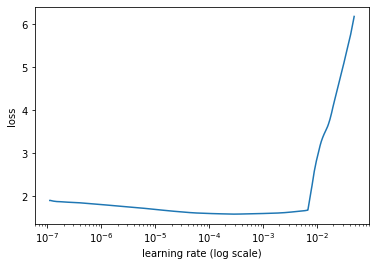

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
hist3 = learner.autofit(5e-5, 5, checkpoint_folder='bert_workshop3')

# hist3 = learner.fit(5e-5, 3, cycle_len=1, cycle_mult=2)
# hist3 = learner.autofit(5e-5, 3, reduce_on_plateau=2, reduce_factor=5)



begin training using triangular learning rate policy with max lr of 5e-05...
Epoch 1/5
1118/1118 [==============================] - 634s 554ms/step - loss: 1.2714 - accuracy: 0.5116 - val_loss: 1.0746 - val_accuracy: 0.5765
Epoch 2/5
1118/1118 [==============================] - 617s 552ms/step - loss: 1.0710 - accuracy: 0.5699 - val_loss: 1.0773 - val_accuracy: 0.5634
Epoch 3/5
1118/1118 [==============================] - 616s 551ms/step - loss: 1.0174 - accuracy: 0.5973 - val_loss: 1.0207 - val_accuracy: 0.6066
Epoch 4/5
1118/1118 [==============================] - 616s 551ms/step - loss: 0.9675 - accuracy: 0.6153 - val_loss: 1.0318 - val_accuracy: 0.5905
Epoch 5/5
1118/1118 [==============================] - 616s 551ms/step - loss: 1.2758 - accuracy: 0.5208 - val_loss: 1.6546 - val_accuracy: 0.4145


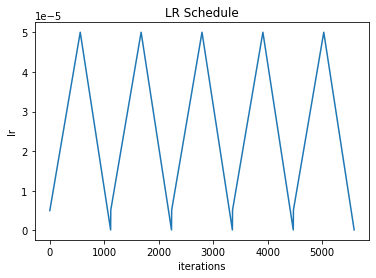

In [ ]:
learner.plot('lr')

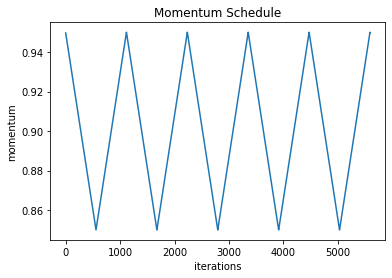

In [ ]:
learner.plot('momentum')

In [ ]:
h1 = go.Scatter(y=hist3.history['loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=hist3.history['val_loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=hist3.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=hist3.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

load mdoel

In [ ]:
model.load_weights('bert_workshop3/weights-04.hdf5')

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train),val_data=(x_val, y_val), batch_size=8)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
cat = predictor.get_classes()
cat

['ไม่สบายใจ',
 'อื่นๆ',
 'วัคซีน',
 'หาความช่วยเหลือ',
 'การรักษา',
 'ความเป็นอยู่',
 'รายงานสถานการณ์']

In [ ]:
learner.validate(val_data=(x_val, y_val), class_names=cat)

                 precision    recall  f1-score   support

      ไม่สบายใจ       0.44      0.57      0.49       170
          อื่นๆ       0.71      0.70      0.71       412
         วัคซีน       0.66      0.81      0.73        63
หาความช่วยเหลือ       0.40      0.07      0.12        28
       การรักษา       0.31      0.38      0.34        45
   ความเป็นอยู่       0.35      0.23      0.28       163
รายงานสถานการณ์       0.79      0.81      0.80       113

       accuracy                           0.59       994
      macro avg       0.52      0.51      0.50       994
   weighted avg       0.58      0.59      0.58       994



array([[ 97,  29,   7,   0,   9,  24,   4],
       [ 61, 290,   5,   2,   8,  36,  10],
       [  6,   4,  51,   0,   0,   2,   0],
       [  0,  12,   0,   2,  10,   2,   2],
       [  9,   9,   2,   1,  17,   3,   4],
       [ 47,  58,   6,   0,   9,  38,   5],
       [  2,   8,   6,   0,   2,   3,  92]])

In [ ]:
predictor.predict_proba("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี") 

array([0.49474183, 0.20863742, 0.00289731, 0.00073143, 0.00927285,
       0.2823149 , 0.00140431], dtype=float32)

In [ ]:
predictor.predict("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี") 

'ไม่สบายใจ'

In [ ]:
pretrain_name = 'bert_sentiment'

In [ ]:
predictor.save(pretrain_name)

In [ ]:
reloaded_predictor = ktrain.load_predictor(pretrain_name)

In [ ]:
reloaded_predictor.predict("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี")

'ไม่สบายใจ'

เทสกับช้อมูล

In [ ]:
df2 = pd.read_csv(file_name,encoding ='utf-8',  usecols=[0,1] ,names=['sentence','types'], header=0)

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
mentality2_df = df[df.types == "ไม่สบายใจ"]
mentality2_df.head()

,sentence,types
11,และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #...,ไม่สบายใจ
18,ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โค...,ไม่สบายใจ
25,หลังปีใหม่ เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้...,ไม่สบายใจ
34,ปิดรอบนี้โดนจ้างออกแน่ #โควิด,ไม่สบายใจ
38,วันนี้ เพิ่มอีก 279 ตายล่ะ เสี่ยงไปไหนได้บ้าง ...,ไม่สบายใจ


In [ ]:
print(len(mentality2_df))

1791


In [ ]:
treatment2_df = df[df.types == "การรักษา"]
treatment2_df.head()

,sentence,types
85,เมื่อมีอาการไอ เจ็บคอ หายใจเหนื่อย มีน้ำมูก จม...,การรักษา
99,หนึ่งในกิจวัตรประจำวันของช่วงนี้ที่ให้ความสำคั...,การรักษา
195,รีไว้เช็คอาการตัวเอง 🤔 #Covid_19 https://t.co/...,การรักษา
253,น้องที่รู้จักทำงานเป็นhealthcare worker ที่อัง...,การรักษา
319,#เราติดหรือยังนะ ? เป็นประโยคที่หลายคนถามตัวเอ...,การรักษา


In [ ]:
print(len(treatment2_df))

430


In [ ]:
being2_df = df[df.types == "ความเป็นอยู่"]
being2_df.head()

,sentence,types
1,มาตรการ​ออกมาแล้วคับ... ปฏิบัติ​ตาม\n\n#Covid_...,ความเป็นอยู่
19,เปิดมาปีแรก​ ยิมก็จะปิดเพราะ​ covid​ อีกแล้ววว...,ความเป็นอยู่
39,ตั้งแต่ปีใหม่นี้ #เปิดบริการทุกวัน #chithailan...,ความเป็นอยู่
60,ประกาศมหาวิทยาลัยศรีนครินทรวิโรฒ\nเรื่อง มาตรก...,ความเป็นอยู่
65,#Covid_19\n#COVID19\n\n เด็กๆหยุดเรียน​เพื่อ​ค...,ความเป็นอยู่


In [ ]:
print(len(being2_df))

1728


In [ ]:
situationrp2_df = df[df.types == "รายงานสถานการณ์"]
situationrp2_df.head()

,sentence,types
0,ด่วน! \n\n23:20 ศูนย์ปฏิบัติการ COVID-19 จังหว...,รายงานสถานการณ์
2,ด่วน! \n\n23:12 ศูนย์ปฏิบัติการ COVID-19 จังหว...,รายงานสถานการณ์
3,ด่วน! แม่ค้าขายกล้วยติดโควิด\n\n23:03 ศูนย์ปฏิ...,รายงานสถานการณ์
4,ด่วน! ระวังคนชอบดื่ม\n\n22:58 ศูนย์ปฏิบัติการ ...,รายงานสถานการณ์
5,ด่วน! แม่ค้าขายพริกแกงติดโควิด-19\n\n22:52 ศูน...,รายงานสถานการณ์


In [ ]:
print(len(situationrp2_df))

1142


In [ ]:
vaccine2_df = df[df.types == "วัคซีน"]
vaccine2_df.head()

,sentence,types
53,ถ้าผลข้างเคียงวัคซีน​ที่คนจะฉีดกันทั้งโลก​ ทำใ...,วัคซีน
103,อิสราเอลฉีดวัคซีน COVID-19 เพียง 15 วันครอบคลุ...,วัคซีน
120,ประเทศไทยมีประชากรประมาณ 68 ล้านคน แต่เดือนกุม...,วัคซีน
154,เจ็บแน่ แต่ไม่จบหรอก ถ้าไม่เร่งวัคซีน\n#Covid_19,วัคซีน
270,นายกฯมั่นใจคนไทยได้รับวัคซีนไม่ช้ากว่าประเทศอื...,วัคซีน


In [ ]:
print(len(vaccine2_df))

667


In [ ]:
help2_df = df[df.types == "หาความช่วยเหลือ"]
help2_df.head()

,sentence,types
68,ช่วยชาวบางละมุง พัทยา กันนะคะ#Covid_19 #nontfa...,หาความช่วยเหลือ
208,ช่วยกันรีโพสหน่อยนะคะ 🙏🏻 ช่วยกันเซฟจังหวัดของเ...,หาความช่วยเหลือ
548,ด้วยสถานการณ์ COVID-19 อาจจะคิดว่าเป็นช่วงเวลา...,หาความช่วยเหลือ
558,ช่วงโควิด ถ้าคิดอยากทำบุญ ขอนำเหนอ ให้ทุกคนไปบ...,หาความช่วยเหลือ
663,#ประกาศชี้แจง สภากาชาดไทยมีทั้งหมด 13 หน่วยงาน...,หาความช่วยเหลือ


In [ ]:
print(len(help2_df))

155


In [ ]:
other2_df = df[df.types == "อื่นๆ"]
other2_df.head()

,sentence,types
9,เชื่อมโยง ราชบุรี-เพชรบุรี 😳 #โควิท19 #โควิดวั...,อื่นๆ
13,โควิดติดแล้วมีสิทธิ์ตาย \nแต่ถ้าติดผู้ชาย ถึงต...,อื่นๆ
16,ฝ่าวิกฤต COVID-19 ด้วยศาสตร์พระราชา\nhttps://t...,อื่นๆ
17,#Covid_19 สะกดแบบไหน,อื่นๆ
20,#azumasoba รีบทานก่อนโดนสั่งปิด #โควิด https:/...,อื่นๆ


In [ ]:
print(len(other2_df))

4025


In [ ]:
test_df2 = pd.concat([mentality2_df,treatment2_df,being2_df,situationrp2_df,vaccine2_df,help2_df,other2_df])
test_df2.sample(5)

,sentence,types
1030,👴🏻 เอไอเอส ไปเมื่อไหร่\n🤦🏻‍♀️ ไปอะไรเล่า ยังไม...,อื่นๆ
358,@MatichonOnline อย่าให้เสียชื่อนะ อุตส่าห์สร้า...,อื่นๆ
468,"#พรุ่งนี้วันเด็ก \n\n#พ่ามมม555 \n "" #หมอชนะ ""...",อื่นๆ
6003,สมุนไพรไทยกับการรักษา COVID-19 โดย ดร.สกันท์ ว...,การรักษา
2226,• LINE : @mtd1572K ( มี@ )\n• ของมาแล้วนะค่า 🛒...,อื่นๆ


In [ ]:
test_df2.shape

(9938, 2)

In [ ]:
x_test = test_df2['sentence'].to_list()
x_test[:5]

['และแล้วธุรกิจสีเทา ของคนมีสี ก็ส่งผลกระทบกับ #ประชาชน อีกรอบ #รอบแล้วรอบเล่า #โควิด #ภาษีกู',
 'ผู้ป่วยรายวันเยอะขนาดนี้ แล้วเราจะรอดหรอวะ #โควิดวันนี้ #โควิด',
 'หลังปีใหม่  เรากับแฟนคิดตรงกันว่าหนักแน่ ขอให้ทุกคนเตรียมพร้อม  #เราจะสู้ไปด้วยกัน #Covid_19 #น่าน',
 'ปิดรอบนี้โดนจ้างออกแน่ #โควิด',
 'วันนี้ เพิ่มอีก 279 ตายล่ะ เสี่ยงไปไหนได้บ้าง #Covid_19']

In [ ]:
y_test = test_df2['types'].to_list()
y_test[:5]

['ไม่สบายใจ', 'ไม่สบายใจ', 'ไม่สบายใจ', 'ไม่สบายใจ', 'ไม่สบายใจ']

In [ ]:
preds = reloaded_predictor.predict(x_test)

save result

In [ ]:
import ktrain
from ktrain import text

In [ ]:
pretrain_name = 'bert_sentiment'

In [ ]:
reloaded_predictor = ktrain.load_predictor(pretrain_name)

In [ ]:
reloaded_predictor.get_classes()

['ไม่สบายใจ',
 'อื่นๆ',
 'วัคซีน',
 'หาความช่วยเหลือ',
 'การรักษา',
 'ความเป็นอยู่',
 'รายงานสถานการณ์']

In [ ]:
class_name = reloaded_predictor.get_classes()

In [ ]:
# def predict(reloaded_predictor, sentences, class_name):
    # ans = []
    # res = reloaded_predictor.predict_proba(sentences)
    # argmax = np.argmax(res,axis=1)
    # for i in range(len(argmax)):
    #     ans.append([sentences[i], class_name[argmax[i]], res[i][argmax[i]]])
    #     #print(sentences[i], class_name[argmax[i]], res[i][argmax[i]])
    # return ans

In [ ]:
# new_st = pd.read_csv("text2model.csv", usecols=[0,1,2,3,4], names=['OE_Sentence_ID','EMP_ID','OE_Sentence','OE_ID','OE_Sentence_Big_Topic'], header=0)

In [ ]:
# type(new_st['OE_Sentence'].tolist())

In [ ]:
# new_str_list = new_st['OE_Sentence'].tolist()

In [ ]:
# ans = predict(reloaded_predictor, new_str_list, class_name)
# ans คือทั้งหมดที่อ่านกับผล

In [ ]:
# ans_pd = pd.DataFrame(ans, columns = ['OE_Sentence', 'OE_Sentence_Sentiment', 'confidence'])

In [ ]:
# ans_pd.to_csv('employee_out.csv', index=False)
# #ได้ข้อมูล 3 column sentence sentiment confident

confusion metrix

In [ ]:
cm = confusion_matrix(y_test, preds)

In [ ]:
cm.shape

(7, 7)

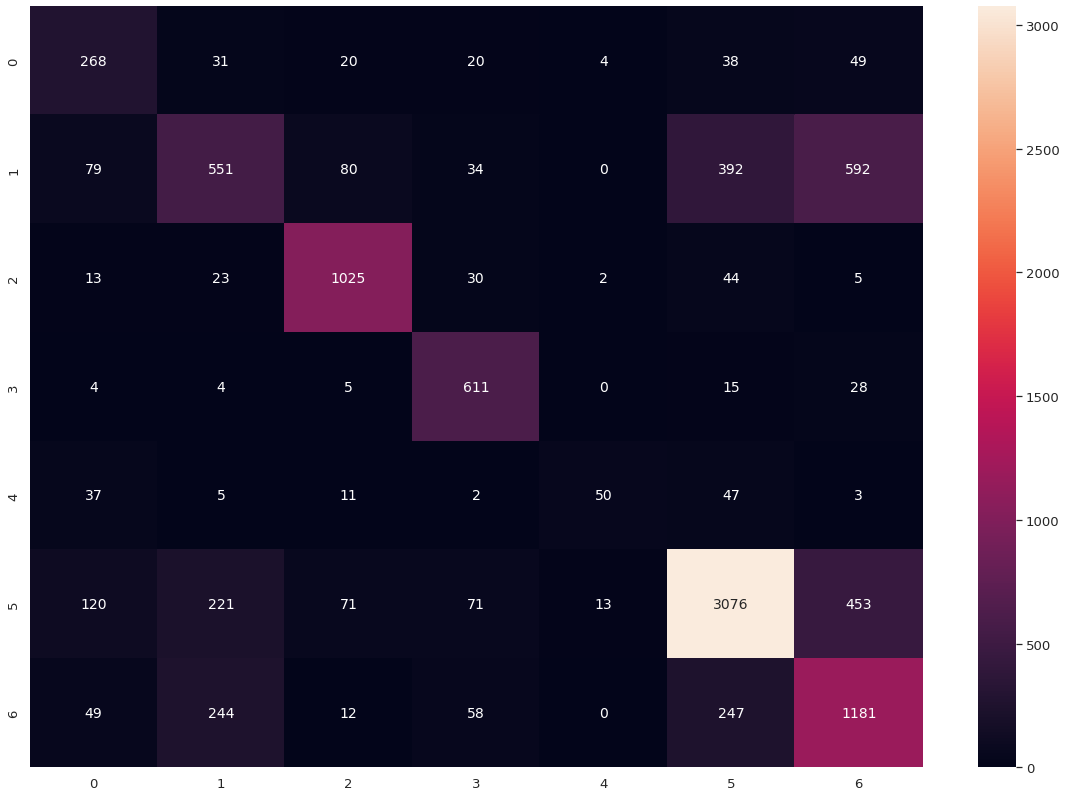

In [ ]:
df_cm = pd.DataFrame(cm, range(7), range(7))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [ ]:
print(classification_report(y_test, preds, target_names=cat, digits=4))

                 precision    recall  f1-score   support

      ไม่สบายใจ     0.4702    0.6233    0.5360       430
          อื่นๆ     0.5107    0.3189    0.3926      1728
         วัคซีน     0.8374    0.8975    0.8664      1142
หาความช่วยเหลือ     0.7397    0.9160    0.8185       667
       การรักษา     0.7246    0.3226    0.4464       155
   ความเป็นอยู่     0.7971    0.7642    0.7803      4025
รายงานสถานการณ์     0.5110    0.6594    0.5758      1791

       accuracy                         0.6804      9938
      macro avg     0.6558    0.6431    0.6309      9938
   weighted avg     0.6812    0.6804    0.6727      9938

